In [1]:
import numpy as np
import pandas as pd
import pydeck as pdk
import matplotlib.pyplot as plt

## Load Integrated NPP Data

In [5]:
npp = pd.read_csv('../data/CalCOFI_Integrated_NPP.csv', index_col=0)

In [7]:
# Visualize Integrated NPP
vis = npp.copy()
vis['Color'] = [[200, 255 * (val / 1000), 100] for val in vis["Integrated_NPP"]]

scatter_layer = pdk.Layer(
    "ScatterplotLayer",
    vis,
    get_position=["Longitude", "Latitude"],
    get_color="Color",  # Adjust color based on NPP
    radius_min_pixels=5,
    radius_max_pixels=50,
    pickable=True,
)

# Define the Pydeck View
view_state = pdk.ViewState(
    latitude=npp["Latitude"].mean(),
    longitude=npp["Longitude"].mean(),
    zoom=4,
    pitch=0
)

# Create the Pydeck Deck
deck = pdk.Deck(
    layers=[scatter_layer],
    initial_view_state=view_state,
    tooltip={"text": "{Sta_ID}\nNPP: {Integrated_NPP}"}
)
deck

{
  "initialViewState": {
    "latitude": 32.74291259946595,
    "longitude": -120.95823629283488,
    "pitch": 0,
    "zoom": 4
  },
  "layers": [
    {
      "@@type": "ScatterplotLayer",
      "data": [
        {
          "Cast_ID": "19-8705NM-PR-121-1851-04600507",
          "Color": [
            200,
            521.114175,
            100
          ],
          "Date": "1987-08-29",
          "Integrated_NPP": 2043.585,
          "Integrated_NPP_HalfDay": 1135.325,
          "Latitude": 40.32,
          "Longitude": -124.68,
          "Sta_ID": "046.0 050.7",
          "Time": "18:51"
        },
        {
          "Cast_ID": "19-8705NM-PR-122-1917-04600530",
          "Color": [
            200,
            534.39075,
            100
          ],
          "Date": "1987-08-30",
          "Integrated_NPP": 2095.65,
          "Integrated_NPP_HalfDay": 1164.25,
          "Latitude": 39.766666,
          "Longitude": -124.493333,
          "Sta_ID": "046.0 053.0",
          "Time": "19:17"
        },
        {
          "Cast_ID": "19-8705NM-PR-129-1943-04800660",
          "Color": [
            200,
            133.53228000000001,
            100
          ],
          "Date": "1987-09-06",
          "Integrated_NPP": 523.6560000000001,
          "Integrated_NPP_HalfDay": 290.92,
          "Latitude": 39.45,
          "Longitude": -125.535,
          "Sta_ID": "048.0 066.0",
          "Time": "19:43"
        },
        {
          "Cast_ID": "19-8705NM-PR-124-1937-04900557",
          "Color": [
            200,
            669.9334500000001,
            100
          ],
          "Date": "1987-09-01",
          "Integrated_NPP": 2627.1900000000005,
          "Integrated_NPP_HalfDay": 1459.5500000000002,
          "Latitude": 39.625,
          "Longitude": -124.661666,
          "Sta_ID": "049.0 055.7",
          "Time": "19:37"
        },
        {
          "Cast_ID": "19-8705NM-PR-127-1931-05050630",
          "Color": [
            200,
            142.39098,
            100
          ],
          "Date": "1987-09-04",
          "Integrated_NPP": 558.396,
          "Integrated_NPP_HalfDay": 310.21999999999997,
          "Latitude": 39.155,
          "Longitude": -125.068333,
          "Sta_ID": "050.5 063.0",
          "Time": "19:31"
        },
        {
          "Cast_ID": "19-8705NM-PR-125-1918-05300587",
          "Color": [
            200,
            127.92788999999999,
            100
          ],
          "Date": "1987-09-02",
          "Integrated_NPP": 501.678,
          "Integrated_NPP_HalfDay": 278.71,
          "Latitude": 38.881666,
          "Longitude": -124.403333,
          "Sta_ID": "053.0 058.7",
          "Time": "19:18"
        },
        {
          "Cast_ID": "19-8705NM-PR-126-1949-05350610",
          "Color": [
            200,
            120.925845,
            100
          ],
          "Date": "1987-09-03",
          "Integrated_NPP": 474.219,
          "Integrated_NPP_HalfDay": 263.455,
          "Latitude": 38.713333,
          "Longitude": -124.518333,
          "Sta_ID": "053.5 061.0",
          "Time": "19:49"
        },
        {
          "Cast_ID": "19-8705NM-PR-131-1914-05500735",
          "Color": [
            200,
            163.72071,
            100
          ],
          "Date": "1987-09-08",
          "Integrated_NPP": 642.042,
          "Integrated_NPP_HalfDay": 356.69,
          "Latitude": 38.011666,
          "Longitude": -125.21,
          "Sta_ID": "055.0 073.5",
          "Time": "19:14"
        },
        {
          "Cast_ID": "19-8705NM-PR-130-1931-05550697",
          "Color": [
            200,
            118.22004000000001,
            100
          ],
          "Date": "1987-09-07",
          "Integrated_NPP": 463.608,
          "Integrated_NPP_HalfDay": 257.56,
          "Latitude": 38.073333,
          "Longitude": -124.891666,
          "Sta_ID": "055.5 069.7",
          "Time": "19:31"
        },
        {
          "Cast_ID": "19-8705NM-PR-120-18

(0.0, 2000.0)

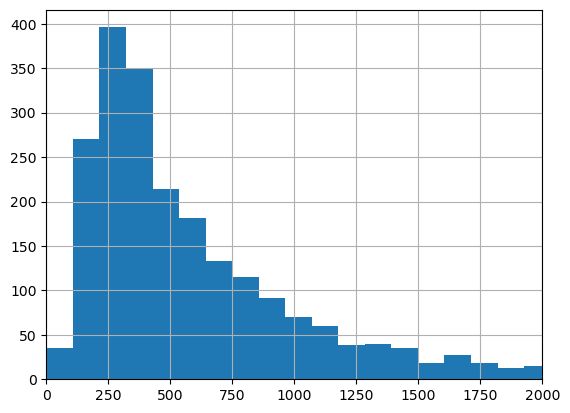

In [8]:
fig, ax = plt.subplots()
npp['Integrated_NPP'].hist(ax=ax, bins=100)
ax.set_xlim(0,2000)

## Get Integrated NPP DataFrame

Bottle Database: https://calcofi.org/data/oceanographic-data/bottle-database/

In [ ]:
data = pd.read_csv('194903-202105_Bottle.csv', encoding='ISO-8859-1', low_memory=False)
metadata = pd.read_csv('194903-202105_Cast.csv', encoding='ISO-8859-1', low_memory=False)

# Subset to only productivity casts
data = data[data['Depth_ID'].str.contains('PR')]

In [ ]:
bottle_data = data[['Sta_ID', 'Depth_ID', 'Depthm', 'MeanAs']].copy()

# Function to extract the date and time from Depth_ID
# Uses the Cast_ID prefix ([Century]-[Year][Month][ShipCode]-[CastType][Julian Day]-[CastTime]-[Line][Sta]) 
# but adds three additional variables: [Depth][Bottle]-[Rec_Ind]
def extract_datetime(depth_id):
    # Extract year, month, and cast time
    year = depth_id.split('-')[0] +  depth_id.split('-')[1][:2]
    month = depth_id.split('-')[1][2:4]
    julianday = depth_id.split('-')[3]
    casttime = depth_id.split('-')[4]
    castid = "-".join(depth_id.rsplit("-", 2)[:-2])
    
    return pd.Series([year, month, julianday, casttime, castid], index=['Year', 'Month', 'JulianDay', 'CastTime', 'Cast_ID'])

# Apply the function to the Depth_ID column
bottle_data[['Year', 'Month', 'JulianDay', 'CastTime', 'Cast_ID']] = bottle_data.loc[:,'Depth_ID'].apply(extract_datetime)

# Function to convert Year, Month, JulianDay to Date
def create_date(year, month, julian_day):
    # Create the date using the Julian day and the year
    date = pd.to_datetime(f'{year}-{month}-01') + pd.to_timedelta(int(julian_day) - 1, unit='D')
    return date

# Function to format CastTime to a time column
def create_time(casttime):
    # CastTime format is HHMM (e.g., 1806 -> 18:06)
    if pd.isna(casttime):
        return None  # If there's no time, return None
    time = f'{str(casttime)[:2]}:{str(casttime)[2:]}'
    return time

# Apply the functions to the dataframe
bottle_data['Date'] = bottle_data.apply(lambda row: create_date(row['Year'], row['Month'], row['JulianDay']), axis=1)
bottle_data['Time'] = bottle_data['CastTime'].apply(create_time)

# Show the updated dataframe
bottle_data = bottle_data.drop(columns=['Year', 'Month', 'JulianDay', 'CastTime'])
bottle_data = bottle_data[['Sta_ID', 'Depth_ID', 'Cast_ID', 'Date', 'Time', 'Depthm', 'MeanAs']]
bottle_data = bottle_data.reset_index(drop=True)

In [ ]:
# Calculate the depth-integrated primary productivity
grouped = bottle_data.groupby(['Sta_ID', 'Cast_ID', 'Date', 'Time'])

def calculate_depth_integrated(group):
    group = group.sort_values(by='Depthm')
    group = group.dropna(subset=['MeanAs', 'Depthm'])
    
    # Calculate area under curve using np.trapezoid
    area = np.trapezoid(group['MeanAs'], group['Depthm'])
    return area

npp = pd.DataFrame(grouped.apply(calculate_depth_integrated, include_groups=False))
npp = npp.reset_index()
npp = npp.merge(metadata[['Cast_ID', 'Lat_Dec', 'Lon_Dec']], on='Cast_ID')
npp.columns = ['Sta_ID', 'Cast_ID', 'Date', 'Time', 'Integrated_NPP_HalfDay', 'Latitude', 'Longitude']
npp['Integrated_NPP'] = npp['Integrated_NPP_HalfDay'] * 1.8
npp = npp[['Sta_ID', 'Cast_ID', 'Date', 'Time', 'Latitude', 'Longitude', 'Integrated_NPP_HalfDay', 'Integrated_NPP']]

In [ ]:
#npp.to_csv('CalCOFI_Integrated_NPP.csv')